# Problem Statement
    The prediction task is to determine whether a person makes over 50K a year. Explain the
    performance of the model using accuracy, AUROC curve and confusion matrix. Feel free
    to add any other metric you see fit.
    Perform a segmentation study on the dataset to display useful information using any
    visualization library.

# Prepare notebook

In [240]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score 

# Data Preparation

In [2]:
%ls -l data/au_train.csv

-rwxrwxrwx 1 1000 1000 3844216 Sep 27 15:03 data/au_train.csv*


In [143]:
from pandas import read_csv
filename1 = 'data/au_train.csv'
filename2 = 'data/au_test.csv'

train_set = read_csv(filename1)
test_set  = read_csv(filename2) 
train_set.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [3]:
train_set.info()
print ('train size:', train_set.shape)
print ('test size:', test_set.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
class             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
train size: (32561, 15)
test size: (16281, 15)


In [4]:
print(train_set.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


In [5]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null int64
native-country    16281 non-null object
class             16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


There are no missing values in the train data set. Data consists of 8 categorical variables, one target which is also non numeric and 6 numerical features.

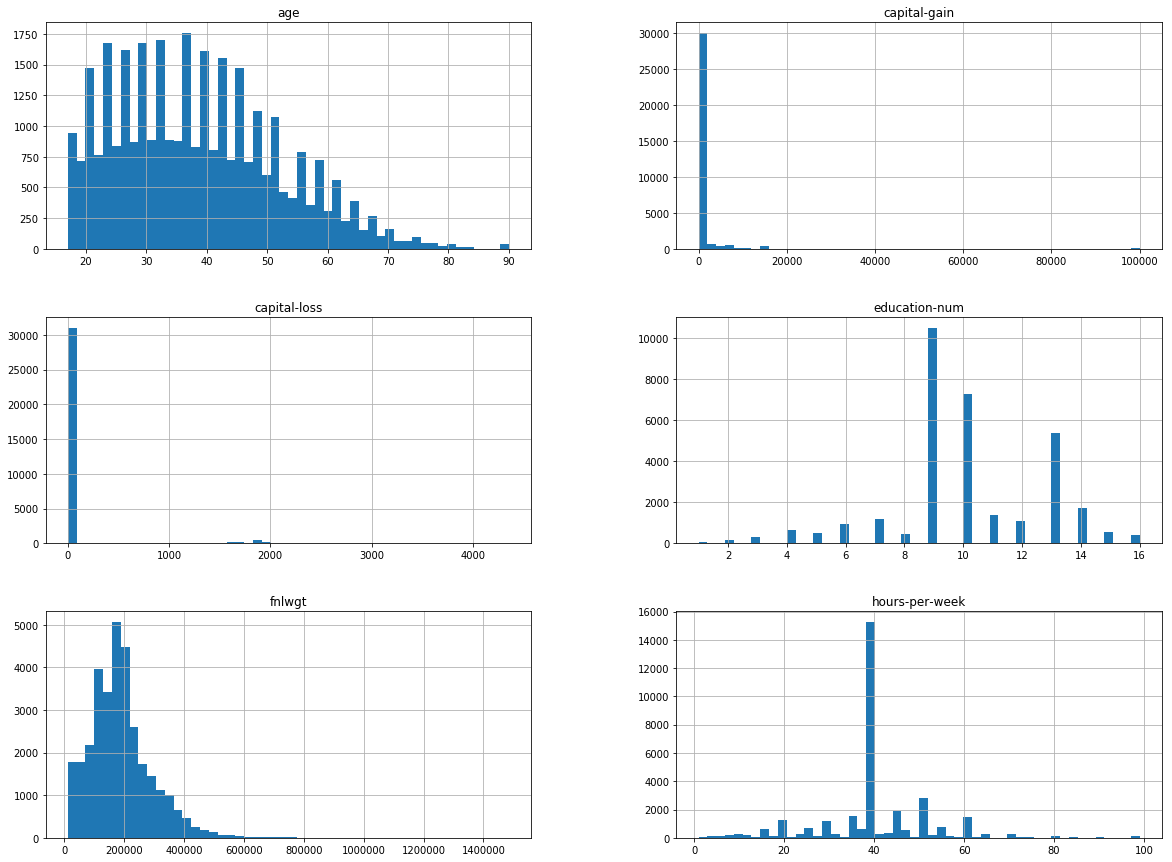

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
print ('train size:', train_set.shape)
print ('test size:', test_set.shape)

train size: (32561, 15)
test size: (16281, 15)


In [8]:
train_set.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


## Data Exploration

In [108]:
train_set=train_set.rename(columns={'education-num':'education_num', 'marital-status': 'marital_status',
                          'capital-gain':'capital_gain', 'capital-loss':'capital_loss',
                  'hours-per-week':'hrs_per_week', 'native-country':'native_country'})
train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


In [106]:
test_set= test_set.rename(columns={'education-num':'education_num', 'marital-status': 'marital_status',
                          'capital-gain':'capital_gain', 'capital-loss':'capital_loss',
                  'hours-per-week':'hrs_per_week', 'native-country':'native_country'})

In [107]:
test_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0


##  Check Correlation among numeric variables

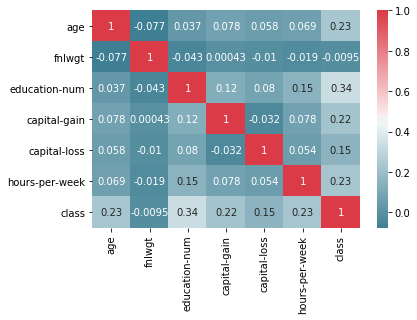

In [243]:
corr = train_set[train_set.columns].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot = True)

This correlation plot shows that education_num is highly correlated with class. Similarly, capital_gain, age and hours_per_week have pretty high correlation with class.

## Some Plots

In [ ]:
train_set.groupby('workclass').sum().plot(x= 'workclass', y='class' )

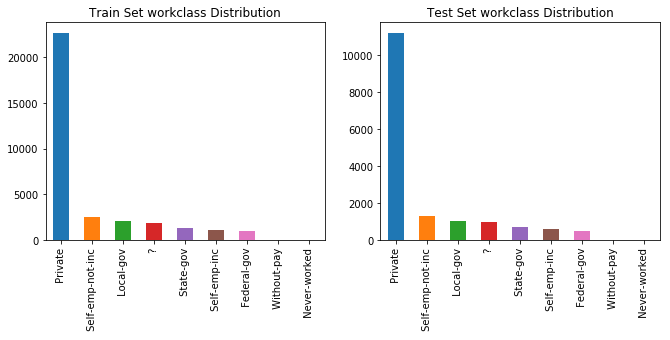

In [281]:
# distribution workclass categories in train and tes data
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title('Train Set workclass Distribution')
pd.value_counts(train_set['workclass']).plot.bar()
plt.subplot(122)
plt.title('Test Set workclass Distribution')
pd.value_counts(test_set['workclass']).plot.bar()   


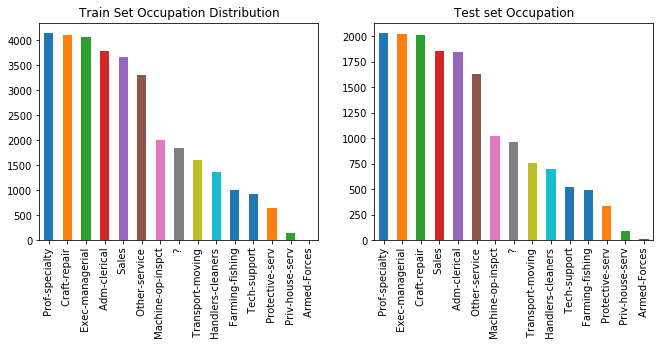

In [285]:
# distribution ooccupation categories in train and tes data
plt.figure(figsize=(11,4))
plt.subplot(121)

plt.title('Train Set Occupation Distribution')
pd.value_counts(train_set['occupation']).plot.bar()
plt.subplot(122)
plt.title('Test set Occupation')
pd.value_counts(test_set['occupation']).plot.bar()


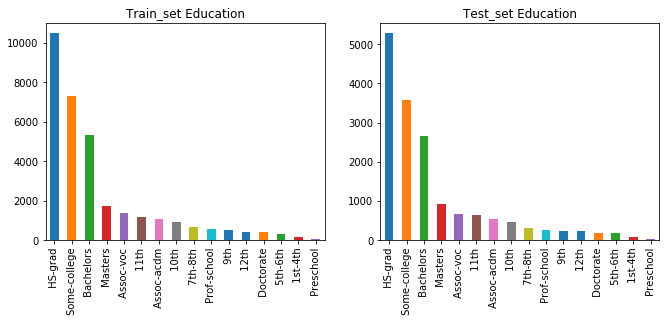

In [103]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title('Train_set Education')
pd.value_counts(train_set['education']).plot.bar()
plt.subplot(122)
plt.title('Test_set Education')
pd.value_counts(test_set['education']).plot.bar()

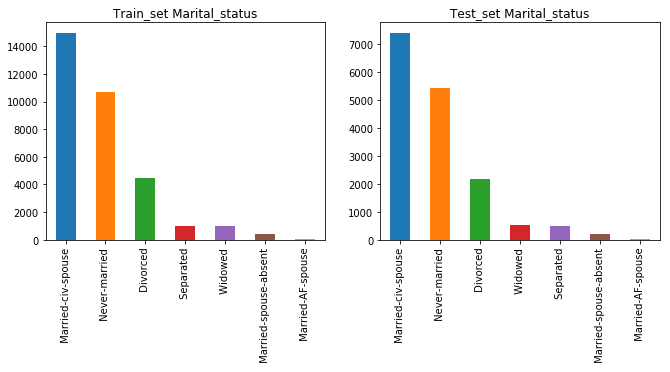

In [110]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title('Train_set Marital_status')
pd.value_counts(train_set['marital_status']).plot.bar()
plt.subplot(122)
plt.title('Test_set Marital_status')
pd.value_counts(test_set['marital_status']).plot.bar()

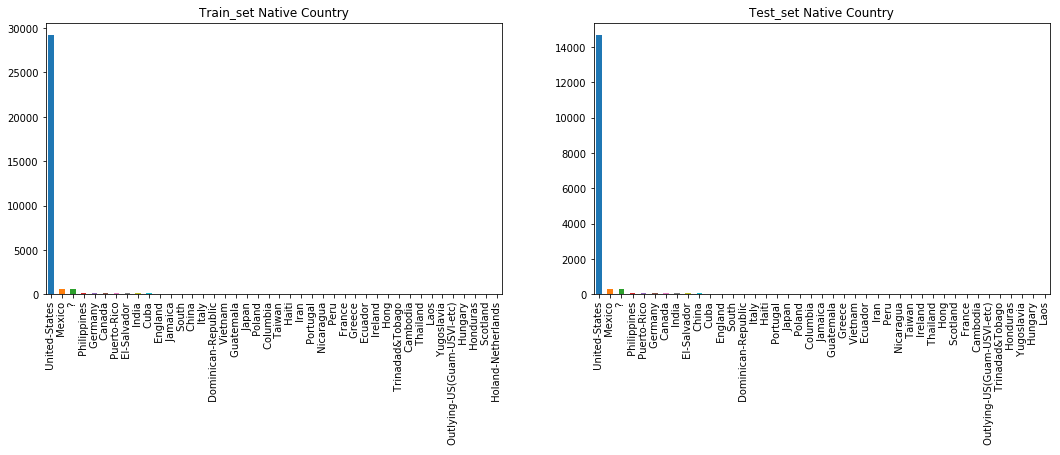

In [119]:
# distribution native country categories in train and tes data
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.title('Train_set Native Country')
pd.value_counts(train_set['native_country']).plot.bar()
plt.subplot(122)
plt.title('Test_set Native Country')
pd.value_counts(test_set['native_country']).plot.bar()

These plot show feature Native_country in test set does not have Holand_Netherlands category which is present in Train set

In [173]:
# To find how many rows there are where native_country is Holand-Netherlands
print(train_set.loc[train_set['native-country']==' Holand-Netherlands'])

       age workclass  fnlwgt      education  education-num  marital-status  \
19609   32   Private   27882   Some-college             10   Never-married   

               occupation     relationship    race      sex  capital-gain  \
19609   Machine-op-inspct   Other-relative   White   Female             0   

       capital-loss  hours-per-week       native-country   class  
19609          2205              40   Holand-Netherlands   <=50K  


So there is only one row in the train set where native_country is Holand- Netherlands. This can be deleted since this category isnot present in test set. This will help even out number of columns while creating dummies

In [180]:
train_set= train_set.drop([19609], axis =0)
#print(train_set.loc[train_set['native-country']==' Holand-Netherlands'])
train_set.shape

(32560, 15)

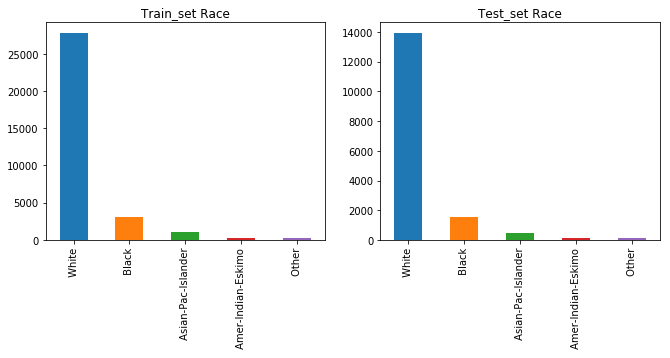

In [114]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title('Train_set Race')
pd.value_counts(train_set['race']).plot.bar()
plt.subplot(122)
plt.title('Test_set Race')
pd.value_counts(test_set['race']).plot.bar()

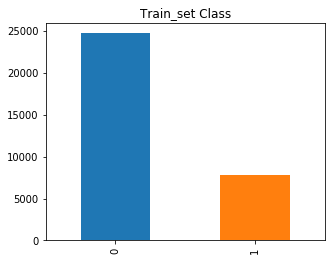

In [239]:
# class distribution in train set

#train_set.groupby(' education_num').sum().plot(x=' education', y=' class')
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title('Train_set Class')
pd.value_counts(train_set['class']).plot.bar()

distribution of target variable 'class' in train set is uneven meaning class <=50K consists of above 70 percent while class >50K is about 30 percent.

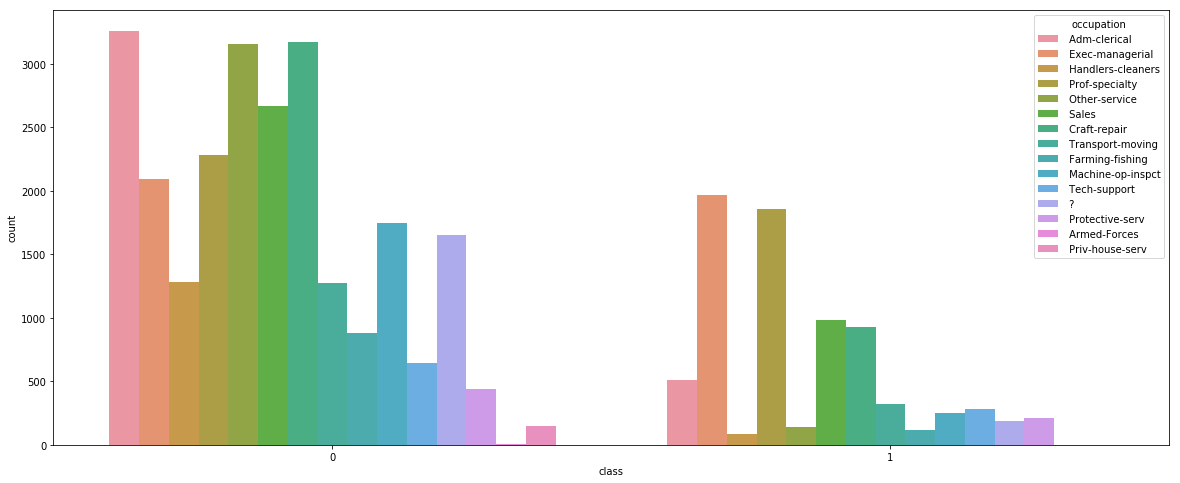

In [251]:

plt.figure(figsize=(20, 8))
ax = sns.countplot(x="class", hue="occupation", data=train_set)

<Figure size 1080x1440 with 0 Axes>

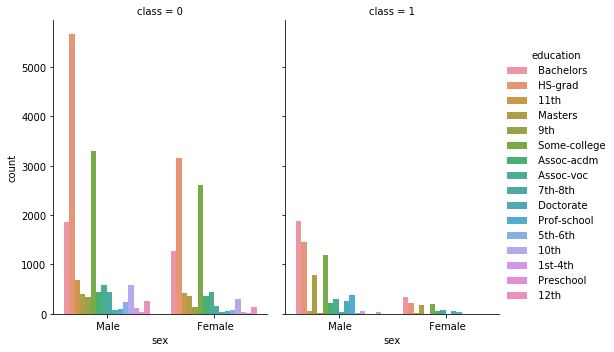

In [259]:
plt.figure(figsize=(15, 20))
g =sns.catplot(x='sex', hue='education', col= 'class',
               data= train_set, kind='count',
               aspect =.7)

## Train test Split
    Since train and test data set is available  separately, train_test_split is not being performed. 
    Available train set is used to train the model and test set will be used for model evaluation.

In [116]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [147]:
# Strategy here is to replace "?" with Nan and then impute Nan in the data set . It is not working right now.

#test_set['workclass']= test_set.replace({'workclass':{'  ?', 'nan'}}, regex = False, inplace=True)

temp_test_set = test_set.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
temp_test_set['workclass']= temp_test_set['workclass'].map(lambda x: np.nan if x=="?"  else x)
#test_set.isnull().sum()
#test_set[test_set.eq('?').any(1)]
#train_set[(train_set.values.ravel() == '?').reshape(train_set.shape).any(1)]

In [149]:
test_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [181]:
train_set.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581849,1.897833e+05,10.080682,1077.681941,87.238790,40.437469
std,13.640593,1.055478e+05,2.572760,7385.403083,402.795459,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Data preparation for machine learning

## One hot encoding
     The data set have 9 categorical variables which needs to be transformed into numerical type before any computation can be done.
    Pandas  get_dummies is being used to convert 9 features into numerical variables. For Target class mapper function is used to convert into numeric data type.

In [182]:
# unique values of target variable
train_set['class'].unique()


array([' <=50K', ' >50K'], dtype=object)

In [183]:
train_set['class'] = train_set["class"].map({ ' <=50K': 0, ' >50K': 1})


In [185]:
train_set.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


In [186]:
# separate target class from train set


X = train_set.drop("class", axis=1)
Y = train_set["class"].copy()

In [187]:
train_set.shape

(32560, 15)

In [188]:

X.shape

(32560, 14)

In [189]:
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import LabelEncoder
import pandas as pd

#encoder = LabelEncoder()

#cat_transform = encoder.fit_transform(cat_features)

#preprocessor = cat_transform(cat_features)

X_train = pd.get_dummies(X)
X_train.shape

(32560, 107)

## Prepare test set 

In [192]:

test_set['class'] = test_set["class"].map({ ' <=50K.': 0, ' >50K.': 1})


In [193]:
test_set.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0


In [194]:
# Extract class from test set

X_test = test_set.drop("class", axis=1)
y_test = test_set["class"].copy()

In [195]:
X_test.shape

(16281, 14)

After encoding features of categorical varibles, there is difference in number of columns. It can certainly be assumed that one of the variable has slightly different set of categories compared to train set.

In [196]:
test_x = pd.get_dummies(X_test)
test_x.shape

(16281, 107)

In [197]:
test_x.head(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Build Classification Model

## Support Vector Machine

In [231]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [234]:
train_pred = svm_clf.predict(X_train)
svm_clf.fit(test_x, y_test)
test_pred = svm_clf.predict(test_x)

### Evaluate SVM model

In [235]:
accuracy = accuracy_score(y_test, y_pred)
auroc = roc_auc_score(y_test, test_pred)
cm = confusion_matrix(y_test, test_pred).astype(int)

print ('accuracy:', accuracy)
print ('auroc:', auroc)
print(cm)

accuracy: 0.9879000061421289
auroc: 0.9440052704641358
[[12423    12]
 [  427  3419]]


In [262]:
# print confusion matrix results

labels=['<=50K', '>50K']
def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]
cm2df(cm, labels)

,<=50K,>50K
<=50K,12423,12
>50K,427,3419


In [274]:
# check count of each class in test_set for comparision

test_set.groupby(['class']).count()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
class,,,,,,,,,,,,,,
0,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435
1,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846


## Random Forest Classifier

In [202]:
rnd_clf= RandomForestClassifier(random_state = 42)
rnd_clf.fit(X_train,Y)
rnd_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [218]:

#print(rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max())
print(rnd_clf.feature_importances_)

[1.48596658e-01 1.64040528e-01 4.71629150e-02 9.68231953e-02
 3.24365661e-02 8.09263101e-02 2.33203306e-03 5.00771464e-03
 5.80235326e-03 9.40274568e-07 1.03027015e-02 6.46156625e-03
 9.07850841e-03 4.37369558e-03 6.59608226e-05 1.94406733e-03
 2.81681442e-03 7.31454634e-04 3.58313357e-04 9.20219151e-04
 3.19343992e-03 1.16394771e-03 1.83183072e-03 2.74652992e-03
 9.04171469e-03 3.95646892e-03 9.21498946e-03 9.61942821e-03
 4.30394686e-05 4.53684603e-03 5.32882184e-03 3.37036263e-03
 2.66383362e-04 8.91368267e-02 7.80963435e-04 1.27388236e-02
 1.21641013e-03 1.50025820e-03 1.40584323e-03 4.85665576e-03
 2.59956491e-05 6.71400755e-03 2.28474721e-02 4.04321728e-03
 2.86686232e-03 3.76802617e-03 9.12307107e-03 1.29622642e-04
 1.57134772e-02 2.70155975e-03 6.55002205e-03 4.41459925e-03
 4.21359488e-03 3.87385702e-02 9.83770580e-03 1.24692608e-03
 8.25599935e-03 3.28079726e-03 1.01327458e-02 1.50523439e-03
 3.14264816e-03 4.82909115e-03 9.74641355e-04 6.94548220e-03
 1.28342256e-02 6.607037

### Evaluate RandomForest model

In [265]:
## test model, accuracy, auroc

rnd_clf.fit(test_x,y_test)
y_pred=rnd_clf.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred)
cm1 = confusion_matrix(y_test, y_pred).astype(int)

print ('accuracy:', accuracy)
print ('auroc:', auroc)
cm2df(cm1, labels)


accuracy: 0.9879000061421289
auroc: 0.9760053055921997


,<=50K,>50K
<=50K,12417,18
>50K,179,3667


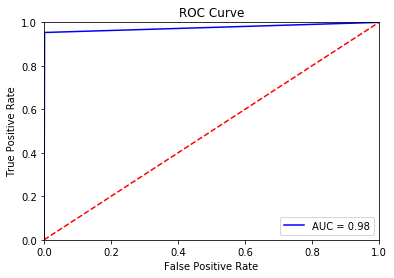

In [226]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Pretty good model with accuracy 0.98, AUROC score of 0.97

## Logistic Regression
    Train a logisticRegression classification model

In [203]:
model = LogisticRegression()


In [205]:

model.fit(X_train, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [206]:
train_pred = model.predict(X_train)


# Test model on test data

In [207]:
model.fit(test_x, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [208]:
# Predict class on test set
y_pred = model.predict(test_x)

## Evaluate Model
    Accuracy score, AUROC score, confusion matrix

In [266]:
train_accuracy = accuracy_score(Y, train_pred)

train_auroc = roc_auc_score(Y, train_pred)

print ('Train acuracy:', train_accuracy)
print( 'Train AuRoc:', train_auroc)


test_accuracy = accuracy_score(y_test, y_pred)

test_auroc = roc_auc_score(y_test, y_pred)
cm3 = confusion_matrix(y_test, y_pred).astype(int) 
print ('Test acuracy:', test_accuracy)
print( 'Test AuRoc:', test_auroc)
cm2df(cm3, labels)

Train acuracy: 0.9604422604422604
Train AuRoc: 0.9201752400462903
Test acuracy: 0.9879000061421289
Test AuRoc: 0.9760053055921997


,<=50K,>50K
<=50K,12417,18
>50K,179,3667


In [241]:
# Run GradientBootingRegressor 

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

## AUROC curve

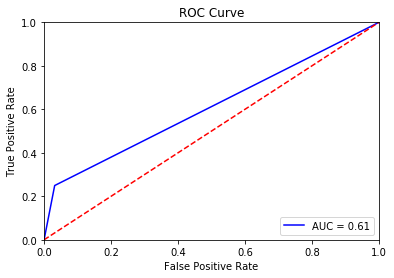

In [214]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Result

Among three tested models, logistic regression performed less accurately compared to Support Vector Machine and RandomForestClassifier. With the calculated  Confusion matrix scores of TN, FP, TP and FN and given data structure class is most like to be <=50K.  

## Cross Validation
    Let's evaluate different models.
    KFold creates set of indices for cross-validation.
    Model evaluation using cross validation is not successful at the moment

In [212]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_idx = list(cv.split(X, Y))

In [213]:
classifier = [LogisticRegression(), GaussianNB(), SVC()]

for C in classifier:
    for train_idx, test_idx in cv_idx:

        # split
        Xtrain, Xtest = X_train[train_idx], test_x[test_idx]
        Ytrain, ytest = Y[train_idx], y_test[test_idx]

        # create logistic regression pipeline
        model = Pipeline([('scaler', StandardScaler()),
                          ('classifier', C)])

        model.fit(X , Y)
        y_pred = model.predict(X_test)

        # evaluate

        if acc is None:
            acc = accuracy_score(y_test, y_pred)
            cm = confusion_matrix(y_test, y_pred).astype(np.float32)
        else:
            acc += accuracy_score(y_test, y_pred)
            cm += confusion_matrix(y_test, y_pred)
        
# take the average value across all folds
acc /= cv.n_splits
cm /= cm.sum(axis=1)[:, np.newaxis]

KeyError: '[    0     1     2 ... 32555 32556 32558] not in index'